References:
https://www.kaggle.com/simjeg/fork-of-epidemium-tutorial
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline





In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [185]:
# Load Data and split into training and test datasets
hist_data_gray_list = []

hist_data = np.load('X.npy')
hist_labels = np.load('Y.npy')

hist_data_gray_list = []


for i in hist_data:
    list_gray = []
    hist_data_array = np.empty([2500,])
    for row in i:
        for rgb in row:
            hist_gray_value = rgb2gray(rgb)
            list_gray.append(int(hist_gray_value))
    array_gray = np.array(list_gray).reshape(50,50)
    hist_data_gray_list.append(array_gray)


hist_data_gray = np.array(hist_data_gray_list)
print(hist_data_gray.shape)

(5547, 50, 50)


In [186]:
print(hist_data_gray.shape)    
print(hist_data_gray)


(5547, 50, 50)
[[[187 179 194 ..., 228 201 224]
  [169 162 177 ..., 190 198 221]
  [199 183 158 ..., 198 168 187]
  ..., 
  [171 160 159 ..., 150 166 153]
  [171 159 152 ..., 103 139 142]
  [157 163 184 ..., 108 184 193]]

 [[175 180 193 ..., 178 214 207]
  [176 170 162 ..., 171 174 162]
  [154 170 186 ..., 164 151 151]
  ..., 
  [238 248 247 ..., 241 245 237]
  [245 241 243 ..., 247 245 247]
  [214 246 246 ..., 245 248 247]]

 [[246 246 247 ..., 248 246 245]
  [246 246 248 ..., 245 246 249]
  [234 230 239 ..., 245 247 245]
  ..., 
  [247 247 247 ..., 243 232 181]
  [247 247 247 ..., 244 207 132]
  [247 247 247 ..., 247 219 146]]

 ..., 
 [[238 237 197 ..., 133 149 191]
  [231 218 204 ..., 123 138 201]
  [194 234 240 ..., 129 119 225]
  ..., 
  [100  97 127 ..., 142 121 129]
  [115 103 220 ..., 138 128 125]
  [ 96 146 236 ..., 137 113 152]]

 [[ 94 206 237 ..., 132 115 153]
  [118 236 237 ..., 161 116 142]
  [149 235 237 ..., 141 113 102]
  ..., 
  [115 108 115 ..., 115 113 105]
  [157

In [187]:
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

In [188]:
hd_gray_scaled = scale(hist_data_gray)
print(hd_gray_scaled.shape)

(5547, 50, 50)


In [189]:
# How many images ?

print('Total number of images : {}'.format(len(hist_data_gray)))
print('Number of images without cancer : {}'.format(np.sum(hist_labels==0)))
print('Number of images with cancer : {}'.format(np.sum(hist_labels==1)))
print('Image shape (number of rows, number of columns, channels RGB): {}'.format(hist_data_gray[0].shape))

Total number of images : 5547
Number of images without cancer : 2759
Number of images with cancer : 2788
Image shape (number of rows, number of columns, channels RGB): (50, 50)


In [197]:

X_train, X_test, Y_train, Y_test = train_test_split(hd_gray_scaled, hist_labels,test_size=0.2,random_state=0)
X_test.shape
# nsamples, nx, ny = X_train.shape
# hist_images_flattened = train_dataset.reshape((nsamples,nx*ny))

(1110, 50, 50)

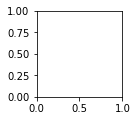

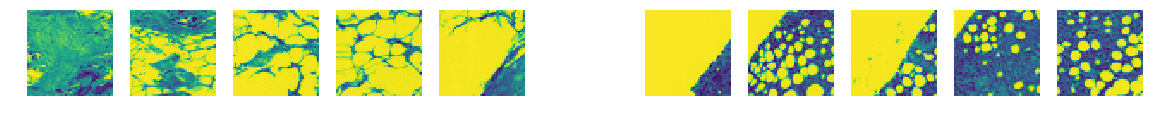

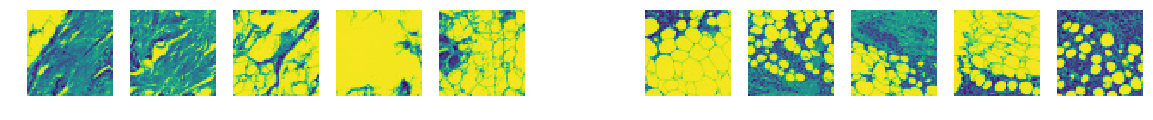

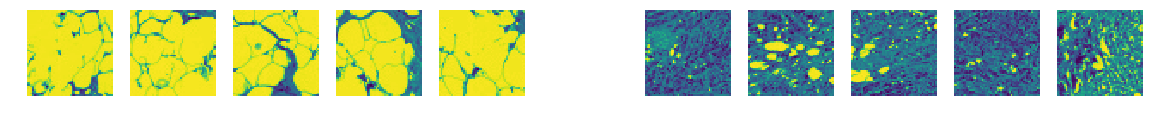

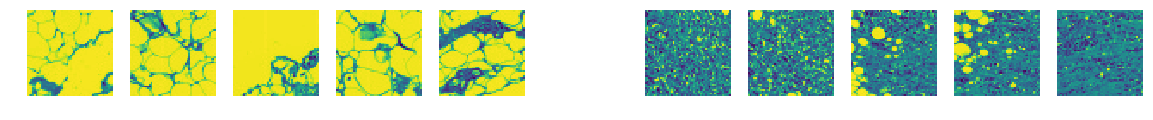

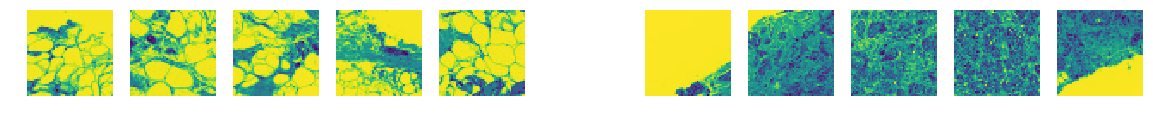

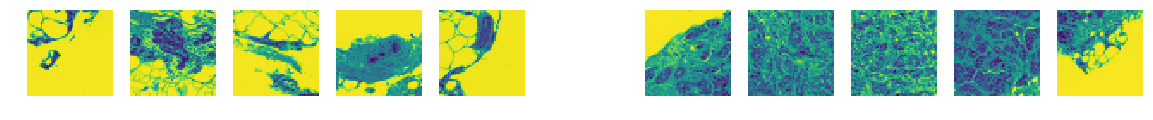

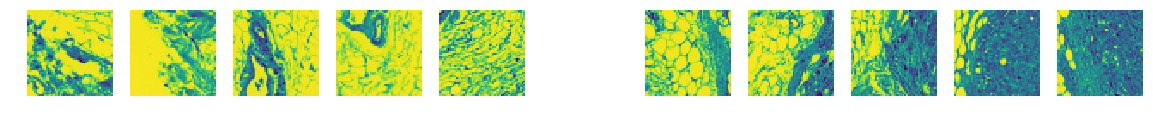

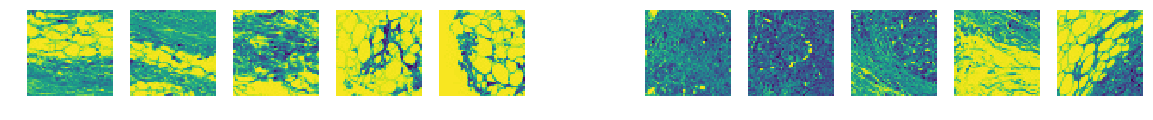

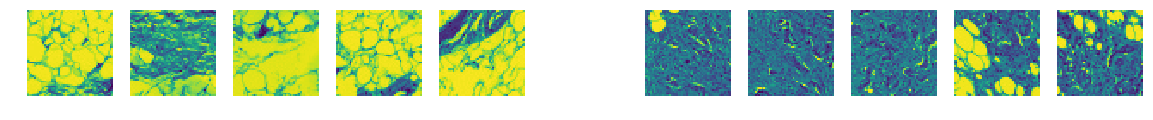

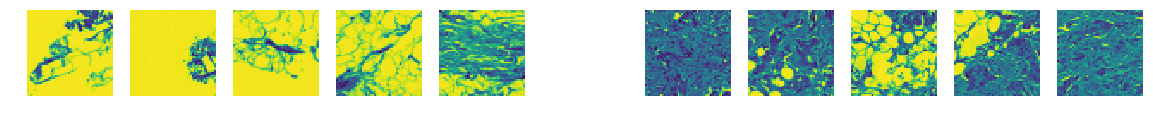

In [191]:

# Looking at some images

imgs0 = hist_data_gray[hist_labels==0] # images with label 0 = no cancer, negative image
imgs1 = hist_data_gray[hist_labels==1] # images with label 1 =    cancer, positive image

batch = 0 # Each batch plot 50 negative images on the left and 50 positive images on the right

for row in range(10):
    plt.figure(figsize=(20, 10))
    for col in range(5):
        plt.subplot(1,11,col+1)
        plt.imshow(imgs0[50*batch + 5*row+col])
        plt.axis('off')
        
        plt.subplot(1,11,col+7)
        plt.imshow(imgs1[50*batch + 5*row+col])
        plt.axis('off')
        
plt.show()


In [192]:

# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])



In [196]:
# Training

# Hyper-parameters. These were set by cross-validation, using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000.0
X_train = X_train.reshape(4437,2500)
# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -1675.81, time = 2.45s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1661.38, time = 2.50s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1667.29, time = 2.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1665.65, time = 2.55s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1664.97, time = 2.51s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1668.21, time = 2.54s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1660.03, time = 2.52s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1660.13, time = 2.51s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1661.72, time = 2.45s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1665.46, time = 2.92s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1669.41, time = 2.52s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1659.66, time = 2.66s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1673.05, time = 2.45s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1661.23, time = 2.55s
[

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
X_test = X_test.reshape(1110,2500)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report( Y_test, classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, logistic_classifier.predict(X_test))))



Logistic regression using RBM features:
             precision    recall  f1-score   support

          0       0.60      0.87      0.71       542
          1       0.78      0.46      0.58       568

avg / total       0.69      0.66      0.64      1110


Logistic regression using raw pixel features:
             precision    recall  f1-score   support

          0       0.59      0.64      0.62       542
          1       0.63      0.58      0.60       568

avg / total       0.61      0.61      0.61      1110




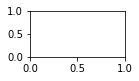

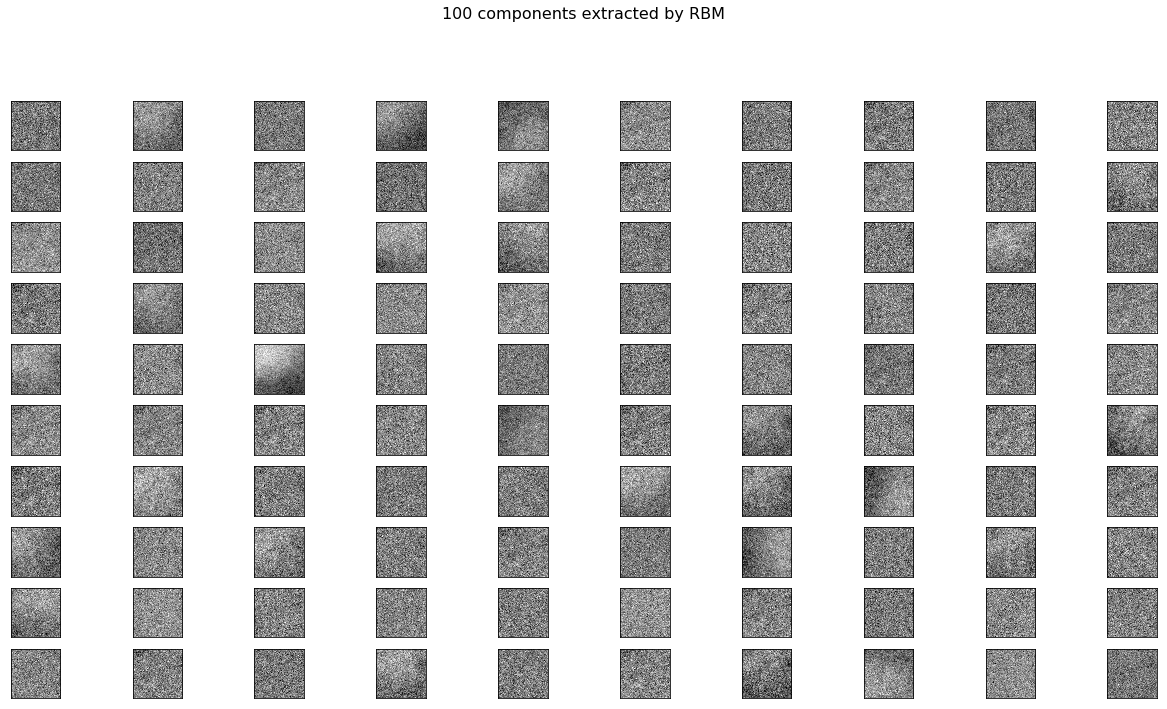

In [201]:
# Plotting

plt.figure(figsize=(20,10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((50, 50)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()